# '일자리' json 데이터 읽기

In [200]:
import json

with open("C:/Users/min/Documents/SocialCom/Twitter/일자리.json", 'r') as f:
    json_data = json.load(f)

# 1. 수집된 Tweet 기초통계

## 1.1 트윗은 총 몇 개이며 트윗은 언제 만들어졌나?

In [201]:
# 환경 세팅
import pandas as pd
import seaborn as sns #시계열 시각화
import matplotlib.pyplot as plt 
import numpy as np # concatenate 등 사용
import collections # Counter 등 사용
import random

In [202]:
original_date = [data['created_at'] for data in json_data] #트윗날짜만 모아 리스트 생성

In [203]:
print(len(original_date)) #데이터 총 개수는 1100
print(original_date[0:2]) #날짜 데이터 형식 확인

1100
['Wed Mar 15 06:30:00 +0000 2023', 'Wed Mar 15 06:29:28 +0000 2023']


In [204]:
original_date = [date.split() for date in original_date]
data_format = list(map(lambda x: x[1]+'-'+x[2]+'-'+x[5], original_date))
print(set(data_format)) 
#모든 데이터가 2023년 3월 14일 혹은 3월 15일자에 생성된 것

{'Mar-14-2023', 'Mar-15-2023'}


In [205]:
#년, 월이 모두 동일하므로 일, 시간(m, s)만 추출함
times = list(map(lambda x: x[2]+':'+x[3][0:5], original_date))

In [206]:
times_sorted = sorted(times) #시간순 정렬

In [207]:
times_dict = collections.Counter(times_sorted)

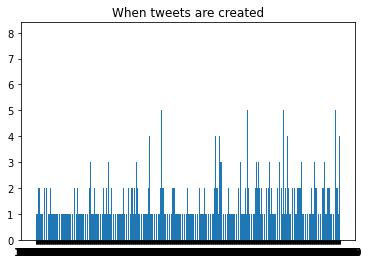

In [208]:
plt.bar(times_dict.keys(), times_dict.values())
plt.title('When tweets are created')
plt.show()

### **결론:**
**- 트윗은 총 1100개이다.**  
**- 해당 데이터 모두 2023년 3월 14일과 15일에 수집된 것이며, 시간대별 트윗의 개수에 뚜렷한 규칙이 드러나지 않는다. 그러나 개수가 평균값보다 높은 경우는 전반보다 후반에 더 많이 나타남을 확인할 수 있다.**

## 1.2 각 트윗의 생성자는 언제 계정을 만들었나?

In [209]:
json_data[0]['user']

{'id': 397672819,
 'id_str': '397672819',
 'name': 'JTBC 뉴스',
 'screen_name': 'JTBC_news',
 'location': '서울시 마포구 상암산로 48-6',
 'description': 'JTBC 뉴스 공식 트위터입니다!! 이곳은 트친 여러분의 이야기와 목소리에 귀 기울이는 곳입니다. 많은 관심과 사랑 부탁드립니다. ^^',
 'url': 'https://t.co/yW0rQYFROa',
 'entities': {'url': {'urls': [{'url': 'https://t.co/yW0rQYFROa',
     'expanded_url': 'https://news.jtbc.co.kr',
     'display_url': 'news.jtbc.co.kr',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 660269,
 'friends_count': 41414,
 'listed_count': 2222,
 'created_at': 'Tue Oct 25 00:50:16 +0000 2011',
 'favourites_count': 296,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 110310,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': 'A9A9A9',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme14/bg.gif',
 'profile_background

In [210]:
users = [x['user'] for x in json_data] #트윗의 user 정보가 추출된 list 생성
print(users[0:1])

[{'id': 397672819, 'id_str': '397672819', 'name': 'JTBC 뉴스', 'screen_name': 'JTBC_news', 'location': '서울시 마포구 상암산로 48-6', 'description': 'JTBC 뉴스 공식 트위터입니다!! 이곳은 트친 여러분의 이야기와 목소리에 귀 기울이는 곳입니다. 많은 관심과 사랑 부탁드립니다. ^^', 'url': 'https://t.co/yW0rQYFROa', 'entities': {'url': {'urls': [{'url': 'https://t.co/yW0rQYFROa', 'expanded_url': 'https://news.jtbc.co.kr', 'display_url': 'news.jtbc.co.kr', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 660269, 'friends_count': 41414, 'listed_count': 2222, 'created_at': 'Tue Oct 25 00:50:16 +0000 2011', 'favourites_count': 296, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 110310, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'A9A9A9', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme14/bg.gif', 'profile_background_image_url_https': 'https://abs.twimg.com

In [211]:
user_created_at = [x['created_at'] for x in users] #user가 계정을 생성한 날짜가 추출된 list 생성
print(len(set(user_created_at))) #940
print(user_created_at[0:1]) #['Tue Oct 25 00:50:16 +0000 2011']

940
['Tue Oct 25 00:50:16 +0000 2011']


In [212]:
user_created_at2 = [date.split() for date in user_created_at]
user_created_at_format = list(map(lambda x: x[5], user_created_at2)) #생성 연도만 슬라이싱
print(len(set(user_created_at_format))) #15: 연도만으로도 15종류가 나옴

15


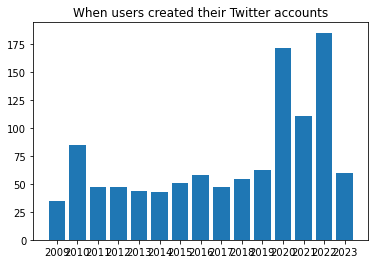

In [213]:
user_created_at_sorted = sorted(user_created_at_format) #정렬
ucas_dict = collections.Counter(user_created_at_sorted)

plt.bar(ucas_dict.keys(), ucas_dict.values())
plt.title('When users created their Twitter accounts')
plt.show()

### **결론:**
**- 3월 14일과 15일에 '일자리'에 대한 트윗을 올린 유저는 대체로 2020년 이후 트위터 계정을 만들었다. 특히 2022년에 계정을 생성한 사람의 수가 가장 많았다.**  
**- 2010년은 당해의 전후에 비해 값이 상대적으로 높은 편이나, 여전히 2020년 이후보다는 낮다.
**- 이러한 현상의 원인을 추론해본다면, 트위터 계정을 만든지 얼마 안 되었을 때 상대적으로 더 활발하게 트윗을 올리는 등의 트위터 활동을 하기 때문이라고 짐작할 수도 있다. 즉 계정을 만든지 10년이 넘은 사용자는 트윗을 올리는 활동에 상대적으로 소홀해지는 경향이 있을 수 있다. 그러나 본 데이터로 명확한 이유를 추론하는 데에는 한계가 있다.**

## 1.3 수집된 트윗 중 가장 follower가 많은 사용자는?

In [214]:
user_followers = list(map(lambda x: (x['name'],x['followers_count']), users)) #(user의 이름: user의 follower 수)를 원소로 하는 리스트 생성
print(user_followers[0:2]) #[('JTBC 뉴스', 660269), ('♦️⭐️🌙💙페라', 117)]

[('JTBC 뉴스', 660269), ('♦️⭐️🌙💙페라', 117)]


In [215]:
user_followers.sort(key=lambda x: x[1], reverse=True) #follwer 수를 기준으로 내림차순 정렬
max_followers_user = user_followers[0]

print(f"'일자리'를 주제로 트윗을 남긴 유저 가운데 팔로워 수가 가장 많은 유저는 '{max_followers_user[0]}'이며, 팔로워 수는 총 {max_followers_user[1]}명이다.")

'일자리'를 주제로 트윗을 남긴 유저 가운데 팔로워 수가 가장 많은 유저는 'JTBC 뉴스'이며, 팔로워 수는 총 660269명이다.


### **결론:**
**- '일자리'를 주제로 트윗을 남긴 유저 가운데 팔로워 수가 가장 많은 유저는 'JTBC 뉴스'이며, 팔로워 수는 총 660269명이다.**

## 1.4 수집된 트윗에서 가장 많이 나오는 해시태그는?

In [216]:
hashtags = [x['entities']['hashtags'] for x in json_data if x['entities']['hashtags'] != []] #해시태그만 추출된 리스트 생성, 단 공란은 리스트에 포함하지 않음
print(hashtags[0:3])

[[{'text': '구인', 'indices': [51, 54]}, {'text': '일자리', 'indices': [55, 59]}, {'text': '구인구직', 'indices': [63, 68]}, {'text': '벼룩시장', 'indices': [69, 74]}, {'text': '구직', 'indices': [75, 78]}], [{'text': '몽땡이_먹', 'indices': [33, 39]}], [{'text': '몽땡이_먹', 'indices': [33, 39]}]]


In [217]:
def extract_text(listed_dic):    
    return [x.get('text') for x in listed_dic]

In [218]:
hashtag_format = [extract_text(x) for x in hashtags] #해시태그의 텍스트만 추출된 리스트 생성
hashtags = np.concatenate(hashtag_format).tolist() #2차원 리스트를 1차원으로 축소
print(hashtags[0:3])

['구인', '일자리', '구인구직']


In [146]:
ht_count = collections.Counter(hashtags)
print(ht_count,'\n')
ht_most = ht_count.most_common()
print(ht_most, '\n')
#collections 모듈의 Counter 함수 및 most_common 메소드를 이용하여 hashtag 당 출현빈도 계산
print(f"'일자리'를 주제로 한 트윗에서 가장 많이 나오는 해시태그는 {ht_most[0][0]}이며, 총 {ht_most[0][1]}회 출현하였다.")

Counter({'몽땡이_먹': 134, 'Faker': 79, '일자리': 33, 'PENTAGON': 27, '펜타곤': 27, '신원': 25, '고신원': 25, 'SHINWON': 25, '구인구직': 24, '퇴근엔퀴즈': 18, '이벤트': 18, '구인': 17, '구직': 17, '벼룩시장': 16, '윤석열대통령': 11, '일자리창출': 11, '윤석열': 9, '미래에셋생명': 7, 'JOB': 7, '우수기업': 6, '카카오톡': 3, '카톡매입': 3, '카톡': 3, '부업': 3, 'ウソク': 2, 'WOOSEOK': 2, '우석': 2, '뉴스1': 2, '전': 2, '챗GPT': 2, '인공지능': 2, '소상공인연합신문': 2, '오찬간담회': 2, '일자리_창출_우수기업': 2, '청와대_영빈관': 2, '투잡': 2, '노예': 1, '국민노예사상': 1, '국민소모품제': 1, 'OECD중': 1, '강남': 1, '서울': 1, '대한민국': 1, 'ESG투데이': 1, '진도군': 1, '부산남구소식': 1, '남구민일자리창출협약': 1, '여매니저': 1, '초보가능': 1, '숙식가능': 1, '전주': 1, '광주': 1, '정읍시': 1, '고페이': 1, '밤알바': 1, '레이디알바': 1, '여우알바': 1, '1인샵': 1, '여성알바': 1, '유흥': 1, '고소득보장': 1, '전북스웨디시': 1, '마사지샵': 1, '전북정읍시': 1, '출퇴가능': 1, '노동개혁': 1, '3대개혁': 1, '일': 1, '재테크': 1, '대전': 1, '알': 1, '대구': 1, '취업': 1, '프리미어': 1, '영상': 1, '유튜브': 1, '주간농업농촌식품동향': 1, '동작구일자리플러스센터': 1, '부업추천': 1, '창업': 1, '쇼핑몰부': 1, '재택근무': 1, '재택부업': 1, '알바': 1, '주부부업': 1, '대학생일바': 1, '아지트샵': 1, '홍대리가전해드립니다'

### **결론:**
**- '일자리'를 주제로 한 트윗에서 가장 많이 나오는 해시태그는 '몽땡이_먹'이며, 총 134회 출현하였다.**  
**- 일자리와 직접 관련된 해시태그가 대부분일 것이라 예상하였으나, 최다 출현 해시태그가 '몽땅이_먹'인 것과 같이 일자리와 직접적으로 연관되지 않은 단어가 top10 안에 다수 포함되었다. 물론 '일자리', '구인구직', '구인', '구직', '일자리창출'과 같은 단어도 다수 출현 해시태그로 발견되었으나, 'PENTAGON', '펜타곤', '고신원' 등 연예인과 관련된 해시태그의 출현 비중이 Top10 안에서 상대적으로 더 높았다.**

# 2. Retweet 통계

In [266]:
retweets = [data for data in json_data if data['retweet_count']>0]

print(len(retweets)) #retweet 횟수가 1이상인 트윗만 추출 #총 758개

758


In [268]:
i=0 #트윗 자체가 원본인 경우 조사

for da in retweets:
    if 'retweeted_status' in list(da.keys()):
        continue
    else:
        i+=1
        
print(i) #37건 존재

37


- 위와 같이 트윗 자체가 원본인 경우가 존재하면, 리트윗한 정보와 원본 정보 간 트윗 내용이 동일함에도 리트윗 표시로 인하여 서로 다른 텍스트로 인식할 여지가 있다. 즉 중복 문제가 발생하게 된다.
- 리트윗 표시를 제외하면, 원본을 리트윗한 text는 원본 text와 그 내용이 동일하므로, 리트윗한 데이터인 경우 리트윗 텍스트(retweets[idx]['text'])를 원본 텍스트(retweets[idx]['retweeted_status']['text'])로 대체한다.

In [269]:
for idx, data in enumerate(retweets):
    if 'retweeted_status' in list(data.keys()):
        retweets[idx]['text'] = retweets[idx]['retweeted_status']['text']
    else:
        continue

In [271]:
def date_format(date): #날짜 정보의 형식을 통일하기 위한 함수 생성
    date = date.split()
    return f'{date[5]}-{date[1]}-{date[2]} {date[3]}'

In [272]:
retweets_info = [{'id': data['id'], 'retweet': data['retweet_count'], 'text': data['text'], 'when': date_format(data['created_at']), 'user': data['user']['name'], 'user_follower':data['user']['followers_count'], 'user_friends':data['user']['friends_count']} for data in retweets]
# retweet 정렬을 위해 필요한 정보만 추출된 리스트 생성
print(retweets_info[0:1])

[{'id': 1635890943588184064, 'retweet': 142, 'text': '이대남 : 경제가 어려워지면 늙은 것들부터 자르고 청년들이 그 자리를 차지한다고!!!!\n\n현실 : 이대남들아 조선소에 일자리 많다더라\n\nhttps://t.co/WsfS84R3HQ', 'when': '2023-Mar-15 06:29:28', 'user': '♦️⭐️🌙💙페라', 'user_follower': 117, 'user_friends': 157}]


In [273]:
retweets_info.sort(key= lambda x: -x['retweet']) #retweet이 많은 순으로 딕셔너리 리스트 정렬
print(retweets_info[0:2])

[{'id': 1635556727415504896, 'retweet': 7118, 'text': '교수들은 지들 집안과 가정은 탄탄하니까..돈걱정이 없으니까 자기 공간이 있으니까 이게 재난상황이라는걸 모르나봐 아니 체험을 못 하고 있나봐 어느집은 일자리가 없어지고 먹여살릴 식구들만 남아버렸는데 교수들은… https://t.co/K8yvmoooIM', 'when': '2023-Mar-14 08:21:25', 'user': '나🍌룻', 'user_follower': 81, 'user_friends': 85}, {'id': 1635555542881144832, 'retweet': 7118, 'text': '교수들은 지들 집안과 가정은 탄탄하니까..돈걱정이 없으니까 자기 공간이 있으니까 이게 재난상황이라는걸 모르나봐 아니 체험을 못 하고 있나봐 어느집은 일자리가 없어지고 먹여살릴 식구들만 남아버렸는데 교수들은… https://t.co/K8yvmoooIM', 'when': '2023-Mar-14 08:16:43', 'user': '🎋아리송(16일 원부리!!!)', 'user_follower': 81, 'user_friends': 108}]


In [274]:
top10_retweets = []
top10_text = []

for i in range(len(retweets_info)):
    if retweets_info[i]['text'] not in top10_text:
        top10_retweets.append(retweets_info[i])
        top10_text.append(retweets_info[i]['text'])
        if len(top10_text) == 10:
            break
    else:
        continue
        
print(top10_retweets[0:1]) #가장 많이 retweet된 트윗(중복 허용X)이 추출됨

[{'id': 1635556727415504896, 'retweet': 7118, 'text': '교수들은 지들 집안과 가정은 탄탄하니까..돈걱정이 없으니까 자기 공간이 있으니까 이게 재난상황이라는걸 모르나봐 아니 체험을 못 하고 있나봐 어느집은 일자리가 없어지고 먹여살릴 식구들만 남아버렸는데 교수들은… https://t.co/K8yvmoooIM', 'when': '2023-Mar-14 08:21:25', 'user': '나🍌룻', 'user_follower': 81, 'user_friends': 85}]


In [275]:
for i in range(10):
    for data in json_data:
        if data['id'] == top10_retweets[i]['id']:            

            if 'retweeted_status' in list(data.keys()):
                top10_retweets[i]['when_first'] = date_format(data['retweeted_status']['created_at'])
                top10_retweets[i]['first_user'] = data['retweeted_status']['user']['name']
                top10_retweets[i]['followers']=data['retweeted_status']['user']['followers_count']
                top10_retweets[i]['friends']=data['retweeted_status']['user']['friends_count']
                
                
            else:
                top10_retweets[i]['when_first'] = top10_retweets[i]['when']
                top10_retweets[i]['first_user'] = top10_retweets[i]['user']
                top10_retweets[i]['followers'] = top10_retweets[i]['user_follower']
                top10_retweets[i]['friends'] = top10_retweets[i]['user_friends']
            break
        else:
            continue
            

print(top10_retweets[0])

{'id': 1635556727415504896, 'retweet': 7118, 'text': '교수들은 지들 집안과 가정은 탄탄하니까..돈걱정이 없으니까 자기 공간이 있으니까 이게 재난상황이라는걸 모르나봐 아니 체험을 못 하고 있나봐 어느집은 일자리가 없어지고 먹여살릴 식구들만 남아버렸는데 교수들은… https://t.co/K8yvmoooIM', 'when': '2023-Mar-14 08:21:25', 'user': '나🍌룻', 'user_follower': 81, 'user_friends': 85, 'when_first': '2020-Sep-18 07:03:43', 'first_user': '박 박 🏀', 'followers': 1229, 'friends': 405}


In [276]:
print("*작성자와 원작성자 및 작성일시와 원본 작성일시가 모두 동일한 것은, 원본 자체인 경우에 해당한다.")
for i in range(len(top10_retweets)):
    print(f"""
리트윗 횟수가 {i+1}번째로 많은 트윗 정보는 이하와 같다.
------------------------------------------------------------------------
➡️내용: {top10_retweets[i]['text']}

➡️리트윗 횟수: {top10_retweets[i]['retweet']}회
➡️작성자: {top10_retweets[i]['user']}
➡️작성 일시: {top10_retweets[i]['when']}

추가로, 원본 트윗에 대한 정보는 이하와 같다.
➡️원작성자: {top10_retweets[i]['first_user']} (팔로워: {top10_retweets[i]['followers']}명, 친구: {top10_retweets[i]['friends']}명)
➡️원본 작성 일시: {top10_retweets[i]['when_first']}
----------------------------------------------------------------

    """)

*작성자와 원작성자 및 작성일시와 원본 작성일시가 모두 동일한 것은, 원본 자체인 경우에 해당한다.

리트윗 횟수가 1번째로 많은 트윗 정보는 이하와 같다.
------------------------------------------------------------------------
➡️내용: 교수들은 지들 집안과 가정은 탄탄하니까..돈걱정이 없으니까 자기 공간이 있으니까 이게 재난상황이라는걸 모르나봐 아니 체험을 못 하고 있나봐 어느집은 일자리가 없어지고 먹여살릴 식구들만 남아버렸는데 교수들은… https://t.co/K8yvmoooIM

➡️리트윗 횟수: 7118회
➡️작성자: 나🍌룻
➡️작성 일시: 2023-Mar-14 08:21:25

추가로, 원본 트윗에 대한 정보는 이하와 같다.
➡️원작성자: 박 박 🏀 (팔로워: 1229명, 친구: 405명)
➡️원본 작성 일시: 2020-Sep-18 07:03:43
----------------------------------------------------------------

    

리트윗 횟수가 2번째로 많은 트윗 정보는 이하와 같다.
------------------------------------------------------------------------
➡️내용: 호열이 포함 백호 군단은 농구하게 된 백호에게서 좋은 영향 많이 받았기 때문에 번듯한 일자리 구해서 좋은 세계에서 살아갈거라 믿고 있음ㅜ프로 돼서 여기저기 다녀온 백호 이야기도 다같이 만나서 들어주고🥺 https://t.co/hBZtAYAdGn

➡️리트윗 횟수: 5383회
➡️작성자: 보리쌀
➡️작성 일시: 2023-Mar-15 06:16:01

추가로, 원본 트윗에 대한 정보는 이하와 같다.
➡️원작성자: 흥부 (팔로워: 2569명, 친구: 35명)
➡️원본 작성 일시: 2023-Mar-01 14:33:45
----------------------------------------------------------------



### 결론
**Retweet 통계 (가장 많이 retweet된 트윗 10개에 대한 정보 및 원본 트윗에 대한 정보) 분석 결과는, 바로 상단의 코드 출력 결과와 같다.**

# 3. Tweet의 연관어 분석
text의 품사 분석 후 동사, 형용사, 명사, 부사만 떼어내기  
단어 빈도 확인 후 stop words 처리-선행연구  
stemming-선행연구  
=> 마스크 트윗에 대한 긍정, 부정 분석-선행연구  
=> 마스크 '제외'한 마스크의 연관어에 대한 word cloud  
=> 워드임베딩  
어..................수많은 과제 합이 10%네.. 너무 고생하진 말고 시간분배 잘 하자...

In [277]:
from konlpy.tag import Okt

okt = Okt()

In [278]:
text_lst = [data['text'] for data in json_data] #트윗 텍스트만 추출한 리스트 생성
print(len(text_lst))
print(text_lst[0:2])

1100
['"안돼, 김정은"…아시아계 여성 비하한 미 보안요원, 결국 일자리 잃었다 https://t.co/IaveSN5hZS\n\n매주 금요일엔 JTBC의 문이 열립니다.\n📌 \'오픈 뉴스룸\' 방청 신청하기 : \nhttps://t.co/laBWm90gTP', '이대남 : 경제가 어려워지면 늙은 것들부터 자르고 청년들이 그 자리를 차지한다고!!!!\n\n현실 : 이대남들아 조선소에 일자리 많다더라\n\nhttps://t.co/WsfS84R3HQ']


## 3.1 트윗 텍스트 내 불필요한 어구(언급, url) 제거

In [279]:
text_combined = ' '.join(text_lst) #한꺼번에 진행하기 위해 여러개의 문자열 원소를 하나의 문자열 원소로 합침

In [280]:
text_split = text_combined.split()
text_phrases = [text for text in text_split if ('RT' not in text) and ('@' not in text) and ('https:' not in text)]

In [281]:
text_combined2 = ' '.join(text_phrases) #한꺼번에 진행하기 위해 여러개의 문자열 원소를 하나의 문자열 원소로 합침

## 3.2 트윗 텍스트의 품사 분석

- 한글 언어 처리는 '띄어쓰기' 및 '조사'로 인해 전처리가 까다로운 편이다.
- 형태소간 결합이 다소 복잡한 한글은 상대적으로 라틴어 계열의 언어보다 NLP 처리가 어려운 문제가 있다.
- KoNLP는 대표적인 파이썬 한글 형태소 패키지이며, 그 가운데 Okt(open-korean-text) 형태소 분석 모듈은 한글 SNS 분석에 적합한 것이다.
- Okt는 normalization, tokenization, stemming과 같은 한국어 처리를 통해 색인어를 추출해준다.  

#### pos('텍스트', norm=True, stem=True)
1. **pos: tokenization 후 각 token에 대한 품사를 분석** (ex. 처리하는 예시입니다 -> 처리Noun, 하는Verb, 예시Noun, 입니다Adjective(이다))
2. **norm: normalization 수행** (ex. 입니닼ㅋㅋ -> 입니다 ㅋㅋ, 샤릉해 -> 사랑해)
3. **stem: stemming 수행** (ex. 입니다 -> 이다)

본 프로젝트는 트윗 텍스트에 대한 연관어를 분석하는 것이므로, 필요한 단어만을 추출하고자 tokenization, normalization, stemming를 모두 진행할 것이다.  

reference: https://github.com/open-korean-text/open-korean-text

In [282]:
pos_tokens = okt.pos(text_combined2, norm=True, stem=True)

우선 트윗 텍스트에서 나타나는 명사, 형용사, 부사, 동사가 어떠한지 파악해볼 것이다.

In [283]:
noun = collections.Counter([word for word, tag in pos_tokens if (tag=='Noun') and (word != '일자리')])
print(noun.most_common(100))

[('롤', 343), ('할머니', 268), ('거', 163), ('대남', 158), ('것', 157), ('진짜', 149), ('모든', 148), ('창', 148), ('앞', 138), ('활동', 136), ('디', 135), ('인사', 135), ('호', 135), ('엑스', 134), ('너리', 134), ('히어로즈', 134), ('오드', 134), ('착용', 134), ('주신', 134), ('승민', 134), ('감사', 134), ('음악', 134), ('마르코', 134), ('프로게이머', 132), ('의', 131), ('청년', 131), ('구직', 120), ('지면', 112), ('버터', 111), ('그', 106), ('채용', 99), ('경제', 94), ('취업', 93), ('현실', 91), ('정치', 87), ('고', 85), ('자리', 83), ('안', 81), ('살', 80), ('차지', 79), ('조선소', 79), ('모집', 79), ('서버', 79), ('함', 78), ('다운', 77), ('등', 77), ('여야', 76), ('점점', 74), ('호구', 73), ('민주당', 73), ('무기', 73), ('확산', 73), ('늬들', 72), ('보전', 72), ('석수', 72), ('견제', 72), ('카운터', 72), ('파트너', 72), ('국힘', 72), ('자연', 72), ('독재', 72), ('권력', 72), ('대안', 72), ('혐오', 72), ('이상', 70), ('집', 69), ('지방', 64), ('구인', 63), ('전국', 63), ('주', 63), ('벼룩시장', 61), ('전', 61), ('안대', 61), ('문제', 61), ('문', 60), ('직', 60), ('직원', 60), ('기업', 58), ('국', 57), ('원', 57), ('모', 57), ('월', 

- top10에 해당되는 '롤', '할머니', 대남' 등의 여러 단어가 '일자리'와 직접 연관되지 않는다는 것을 발견할 수 있다.
- stopword가 많이 보이며 품사태깅/형태소 분석이 잘못된 원소도 몇몇 있다.

In [284]:
adj = collections.Counter([word for word, tag in pos_tokens if (tag=='Adjective')])
print(adj.most_common(100))

[('망하다', 263), ('없다', 204), ('많다', 172), ('있다', 141), ('행복하다', 135), ('멋지다', 134), ('이렇다', 92), ('가능하다', 59), ('좋다', 59), ('상관없다', 56), ('같다', 54), ('아니다', 26), ('그렇다', 21), ('번듯하다', 19), ('안되다', 16), ('거지같다', 12), ('부다', 11), ('어떻다', 11), ('높다', 7), ('이다', 7), ('급격하다', 7), ('어렵다', 6), ('상당하다', 6), ('필요하다', 5), ('다양하다', 5), ('길다', 5), ('바쁘다', 5), ('심하다', 4), ('유일하다', 4), ('어마어마하다', 4), ('무섭다', 4), ('피곤하다', 4), ('힘들다', 4), ('원하다', 4), ('야하다', 3), ('젊다', 3), ('당연하다', 3), ('부족하다', 3), ('미미하다', 3), ('계시다', 3), ('미치다', 3), ('힘드다', 3), ('가난하다', 2), ('비싸다', 2), ('싫어하다', 2), ('희다', 2), ('적합하다', 2), ('강력하다', 2), ('자세하다', 2), ('어설프다', 2), ('새롭다', 2), ('기쁘다', 2), ('뿌듯하다', 2), ('좋아하다', 2), ('솔직하다', 2), ('아프다', 2), ('당하다', 2), ('짜증나다', 2), ('적응하다', 2), ('탄탄하다', 2), ('편하다', 2), ('괜찮다', 2), ('단단하다', 2), ('고달프다', 2), ('밉다', 1), ('두렵다', 1), ('정신차리다', 1), ('좁다', 1), ('심각하다', 1), ('신나다', 1), ('활기차다', 1), ('건강하다', 1), ('우수하다', 1), ('화려하다', 1), ('푸르다', 1), ('징그럽다', 1), ('화하다', 1), ('싫다', 1), ('다르다', 1), ('

형용사의 경우 추출된 단어만 보았을 때에는, tokeization, stemming까지 진행하였기 때문인지 실제 트윗이 전하고자 했던 메시지가 제대로 반영되지 않았다고 판단하였다. 예컨대 '멋지지 않아' 혹은 '아 행복하다~'라는 트윗에서 (후자가 반어법이라고 가정할 때) 부정 감정을 직접 드러내는 의미가 추출되었다기보다는 '멋지다'와 '행복하다'와 같은 긍정단어가 추출되었다. 그럼에도 '일자리'와 연관된 형용사의 목록을 어느 정도 파악할 수 있다는 점에서 의미가 있다.

In [285]:
adv = collections.Counter([word for word, tag in pos_tokens if (tag=='Adverb')])
print(adv.most_common(100))

[('다', 129), ('그렇게', 76), ('너무', 38), ('많이', 22), ('물론', 16), ('특히', 9), ('근데', 9), ('맨날', 6), ('응응', 5), ('걍', 5), ('결국', 4), ('딱', 4), ('없이', 4), ('이렇게', 4), ('이미', 3), ('또는', 3), ('그래서', 3), ('함께', 3), ('어디서', 2), ('그만', 2), ('빨리', 2), ('아무튼', 2), ('훨씬', 2), ('우', 2), ('매주', 1), ('그나마', 1), ('그저', 1), ('쿨럭', 1), ('왠지', 1), ('같이', 1), ('혹은', 1), ('드디어', 1), ('그래도', 1), ('할까말까', 1), ('으흐흑', 1), ('이래저래', 1), ('아직도', 1), ('갈아', 1), ('흑', 1), ('간신히', 1), ('어느', 1), ('풍', 1), ('오래', 1), ('아마도', 1), ('쓸데없이', 1)]


부사의 경우 형용사 리스트(adj)에서 발견된 것과 비슷한 문제가 발견되었다.

In [286]:
verb = collections.Counter([word for word, tag in pos_tokens if tag=='Verb'])
print(verb.most_common(100))

[('하다', 832), ('잃다', 189), ('돼다', 182), ('되다', 174), ('만들다', 154), ('주다', 148), ('추다', 148), ('드리다', 140), ('이다', 89), ('되어다', 88), ('터지다', 81), ('어려워지다', 80), ('늙다', 79), ('자르다', 79), ('먹다', 79), ('치다', 76), ('갈다', 73), ('쪼그라들다', 72), ('지다', 64), ('보다', 42), ('놓이다', 39), ('시키다', 35), ('받다', 31), ('가다', 22), ('나오다', 22), ('않다', 21), ('만나다', 21), ('짓다', 21), ('다녀오다', 19), ('들어주다', 19), ('들다', 19), ('살아가다', 18), ('믿다', 18), ('켜지다', 18), ('찾다', 16), ('두다', 15), ('맞다', 14), ('오다', 14), ('모르다', 14), ('해주다', 13), ('크다', 11), ('보내다', 11), ('가보다', 10), ('싶다', 10), ('들어가다', 10), ('고르다', 9), ('느끼다', 8), ('쉬다', 8), ('이르다', 8), ('살다', 8), ('따르다', 8), ('알아보다', 8), ('늘리다', 8), ('자다', 7), ('해보다', 7), ('넣다', 7), ('줄이다', 7), ('그만두다', 7), ('얻다', 7), ('없어지다', 7), ('찾아가다', 7), ('올리다', 7), ('보이다', 6), ('대다', 6), ('업다', 6), ('떼다', 6), ('씻다', 6), ('데리다', 6), ('돌보다', 6), ('비다', 5), ('내다', 5), ('나다', 5), ('버리다', 5), ('살리다', 5), ('닫다', 5), ('해오다', 5), ('말아먹다', 5), ('지나다', 4), ('웃기다', 4), ('짜다', 4), ('들리다', 4), 

동사 분석 결과 '잃다', '터지다', '어려워지다', '늙다' 등 부정적인 단어가 top20 안에 큰 비중으로 나타났다.

## 3.3 WordCloud 통해 연관어 시각화

'일자리'에 대한 트윗 텍스트를 품사별로 분류해본 결과 상대적으로 명사, 형용사, 동사가 나머지보다 연관된 정보를 제공해주는 편이라고 판단하였다.  
이에 명사, 형용사, 동사를 포함한 리스트를 WordCloud로 시각화해보고자 한다.  
이후, 형용사와 동사만 별도로 추출하여 이를 WordCloud로 시각화해볼 것이다.

### 3.3.1 stopwords 제거
본격적인 시각화에 앞서 WordCloud가 보다 더 명확한 정보를 전달할 수 있도록, **stopword를 제거**하고자 한다.  
stopword 선별 기준은 본 텍스트에서의 '출현 빈도가 높지만 의미가 적은' 것이다.

In [287]:
stopwords = ['거', '것', '디', '호', '너리', '의', '그', '고', '안', '등', '함', '전', '직', '없다', '있다', '이렇다', '아니다', '그렇다', '어떻다', '이다', '하다', '돼다', '되다', '드리다', '이다', '되어다']

In [288]:
#stopwords 필터링
POS_lst = ['Noun', 'Adjective', 'Adverb']

wordcloud_lst = collections.Counter([word for word, tag in pos_tokens if tag in POS_lst and (word != '일자리') and word not in stopwords])

In [289]:
AdjAdv_lst = ['Adjective', 'Adverb']

adjadv_lst = collections.Counter([word for word, tag in pos_tokens if tag in AdjAdv_lst and (word != '일자리') and word not in stopwords])

### 3.3.2 WordCloud

In [290]:
from PIL import Image
from wordcloud import WordCloud
font_path = 'C:/Users/min/AppData/Local/Microsoft/Windows/Fonts/NotoSansKR-Bold.otf'

### Hey Twitter, what are related to '일자리'?

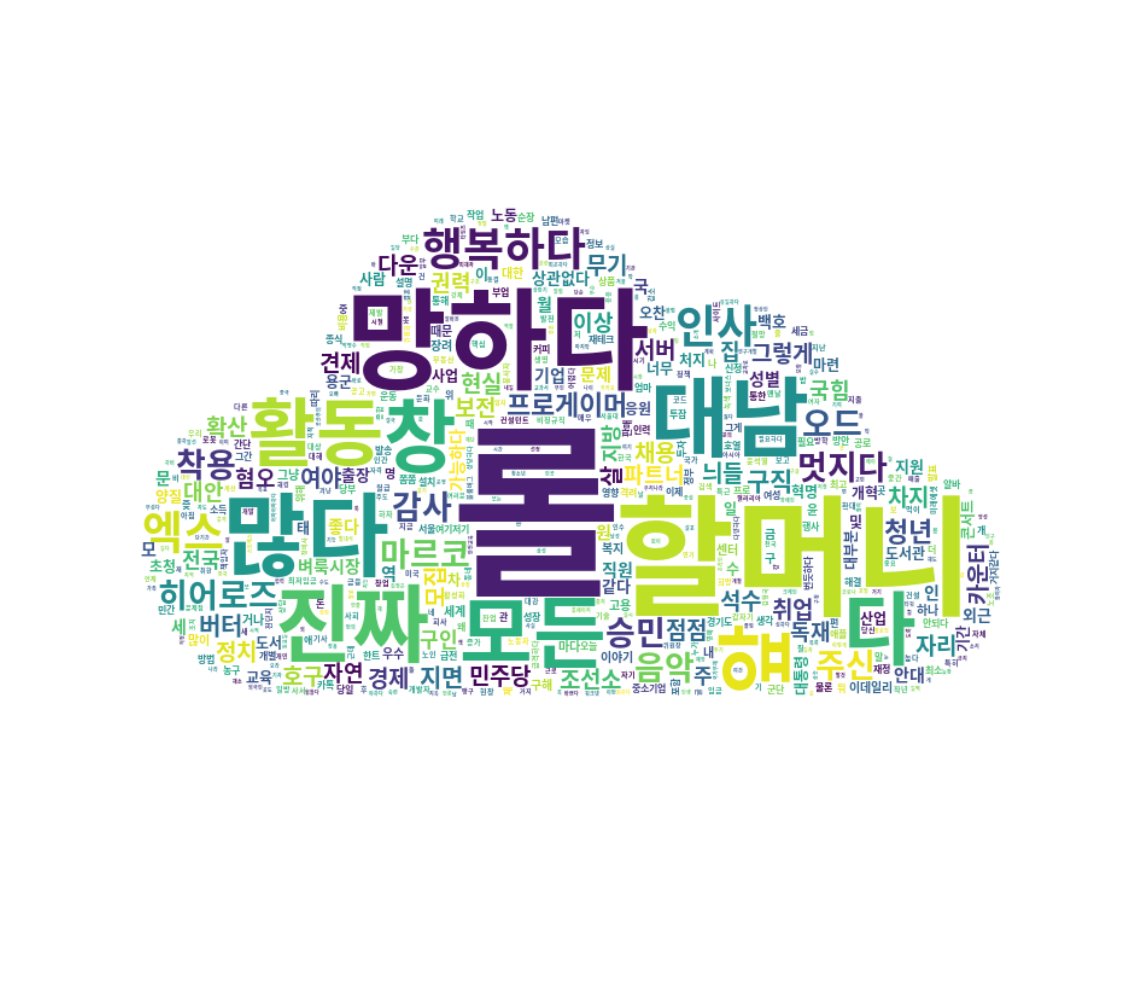

In [291]:
def makeImage(text):
    black_mask = np.array(Image.open('C:/Users/min/Documents/SocialCom/Twitter/cloud.png'))

    wc = WordCloud(font_path = font_path,background_color="white", max_words=1000, mask=black_mask, margin=2)
    
    dictionary = dict(text)
    wc.generate_from_frequencies(dictionary)
    
    plt.figure(figsize = (20,20))
    
    plt.imshow(wc, interpolation="bilinear")

    plt.axis("off")
    plt.show()
    

makeImage(wordcloud_lst)

### Focusing on the adjectives and verbs, what is the recent atmosphere related to '일자리'?

In [292]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

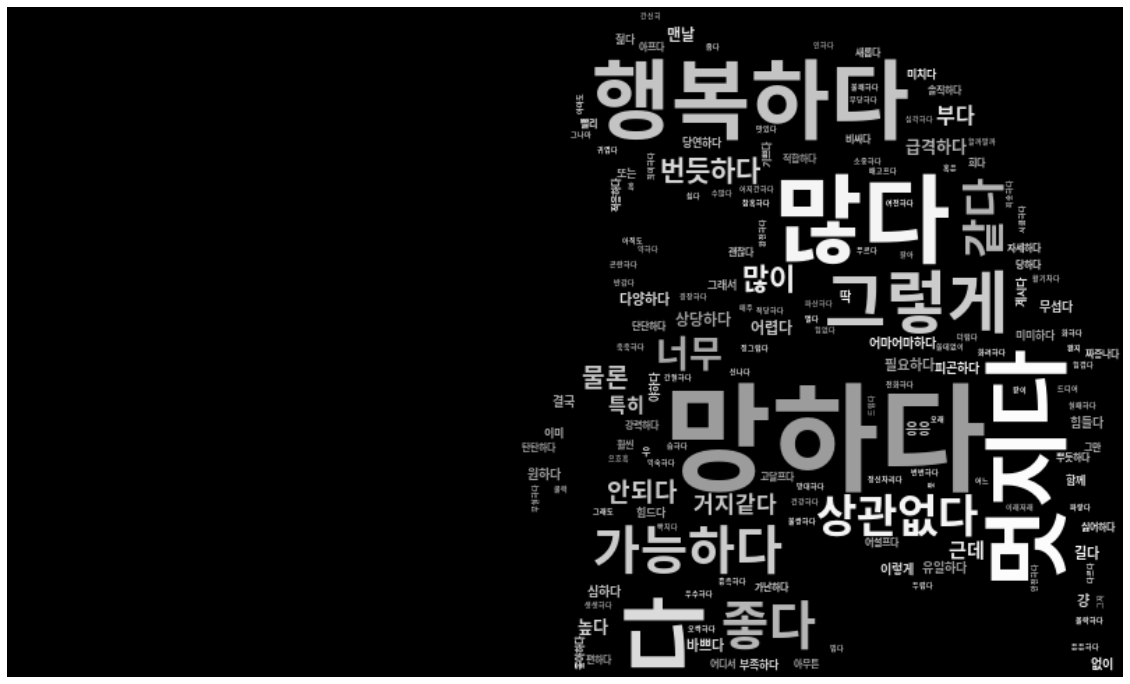

In [293]:
def makeImage(text):
    black_mask = np.array(Image.open('C:/Users/min/Documents/SocialCom/Twitter/b_unemployment.jpg'))

    wc = WordCloud(font_path = font_path, background_color="black", max_words=1000, mask=black_mask, margin=2)
    
    dictionary = dict(text)
    wc.generate_from_frequencies(dictionary)
    
    plt.figure(figsize = (20,20))
    
    plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")

    plt.axis("off")
    plt.show()
    

makeImage(adjadv_lst)